In [1]:
# Scientific libraries		              
import numpy as np		              
import scipy as sp		              
import pandas as pd		              
import json		              
import missingno as msno		              

# Loading Plotting Modules		              
import matplotlib		              
import matplotlib.pyplot as plt		              
import seaborn as sns		              
%matplotlib inline		              
import chart_studio.plotly as py		              
import plotly.figure_factory as ff		              
import plotly.graph_objects as go		              
import plotly.express as px		              
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot		              
init_notebook_mode(connected=True)		              
		              
import os		              
import gc

In [2]:
# Setting Data Frame Options                      
pd.set_option('display.max_rows', 150)                      
pd.set_option('display.max_columns', 50)                      
pd.set_option('display.width', 100)                      
pd.set_option('display.max_colwidth', 100)                      

# Setting Plot Configuration                      
sns.set(rc={'figure.figsize':(19,11)}, style = 'white')

In [3]:
train = pd.read_csv('../../data/train.csv')  
m, n = train.shape                
print('Data Frame: {} x {}'.format(m,n))                
train.head()

Data Frame: 3865 x 80


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46.018230,98.216072,...,NaN,NaN,NaN,75.604799,NaN,NaN,42.616284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,NaN,NaN,36.255559,423.973089,89.294181,117.069332,61.822590,13.054898,560.547706,58.573002,69.873905,76.752305,40.167960,88.322574,...,NaN,NaN,NaN,57.214150,57.314932,56.187355,29.908422,6.225946,44.780023,NaN,120.886080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,NaN,NaN,18.093991,285.572207,57.491083,226.523760,134.558437,15.963001,555.012461,43.078497,59.462626,59.152506,91.093668,114.163995,...,NaN,NaN,NaN,76.141735,42.405827,53.927715,18.732049,4.138115,24.030945,NaN,96.626831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.202247,47.785456,279.000175,193.228799,12.940991,766.807703,51.318372,50.535797,54.931369,92.727892,97.645232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,NaN,NaN,34.497468,633.799718,103.562629,28.359587,51.098250,25.521926,585.434804,56.158054,85.020965,84.708158,71.493810,53.835875,...,NaN,NaN,134.967049,NaN,77.223935,75.475076,31.398393,NaN,66.674651,NaN,N

In [4]:
test = pd.read_csv('../../data/test.csv')  
m, n = test.shape                
print('Data Frame: {} x {}'.format(m,n))                
test.head()

Data Frame: 890 x 79


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,105.193088,64.241392,17.418350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771,55.730638,46.217440,33.027886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771,58.755900,48.897493,31.613362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060,70.176431,61.254104,34.399007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069,69.768692,51.316940,15.657091,1106.554194,64.382217,219.588961,129.974418,14.013421,474.877713,21.305665,59.144562,63.990109,80.409057,111.084652,...,96.028122,21309.50697,18103.974021,50.233592,86.296925,29.065459,58.562225,13.313253,NaN,42.980727,99276.25673,NaN,458.186555,79.177012,41.585873,7.357729,0.583373,0.600445,0.856158,206.674424,224.104054,NaN,7.687626,NaN,NaN


In [5]:
df = train.append(test, ignore_index=True)
df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46.018230,98.216072,...,NaN,NaN,NaN,75.604799,NaN,NaN,42.616284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,NaN,NaN,36.255559,423.973089,89.294181,117.069332,61.822590,13.054898,560.547706,58.573002,69.873905,76.752305,40.167960,88.322574,...,NaN,NaN,NaN,57.214150,57.314932,56.187355,29.908422,6.225946,44.780023,NaN,120.886080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,NaN,NaN,18.093991,285.572207,57.491083,226.523760,134.558437,15.963001,555.012461,43.078497,59.462626,59.152506,91.093668,114.163995,...,NaN,NaN,NaN,76.141735,42.405827,53.927715,18.732049,4.138115,24.030945,NaN,96.626831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.202247,47.785456,279.000175,193.228799,12.940991,766.807703,51.318372,50.535797,54.931369,92.727892,97.645232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,NaN,NaN,34.497468,633.799718,103.562629,28.359587,51.098250,25.521926,585.434804,56.158054,85.020965,84.708158,71.493810,53.835875,...,NaN,NaN,134.967049,NaN,77.223935,75.475076,31.398393,NaN,66.674651,NaN,N

In [111]:
keyword = 'Development Index'

In [113]:
df.loc[:, df.columns.str.contains(keyword)].notna().sum()

Intergalactic Development Index (IDI)                  4356
Intergalactic Development Index (IDI), Rank            4312
Intergalactic Development Index (IDI), female          1476
Intergalactic Development Index (IDI), male            1475
Gender Development Index (GDI)                         1474
Intergalactic Development Index (IDI), female, Rank    1442
Intergalactic Development Index (IDI), male, Rank      1441
dtype: int64

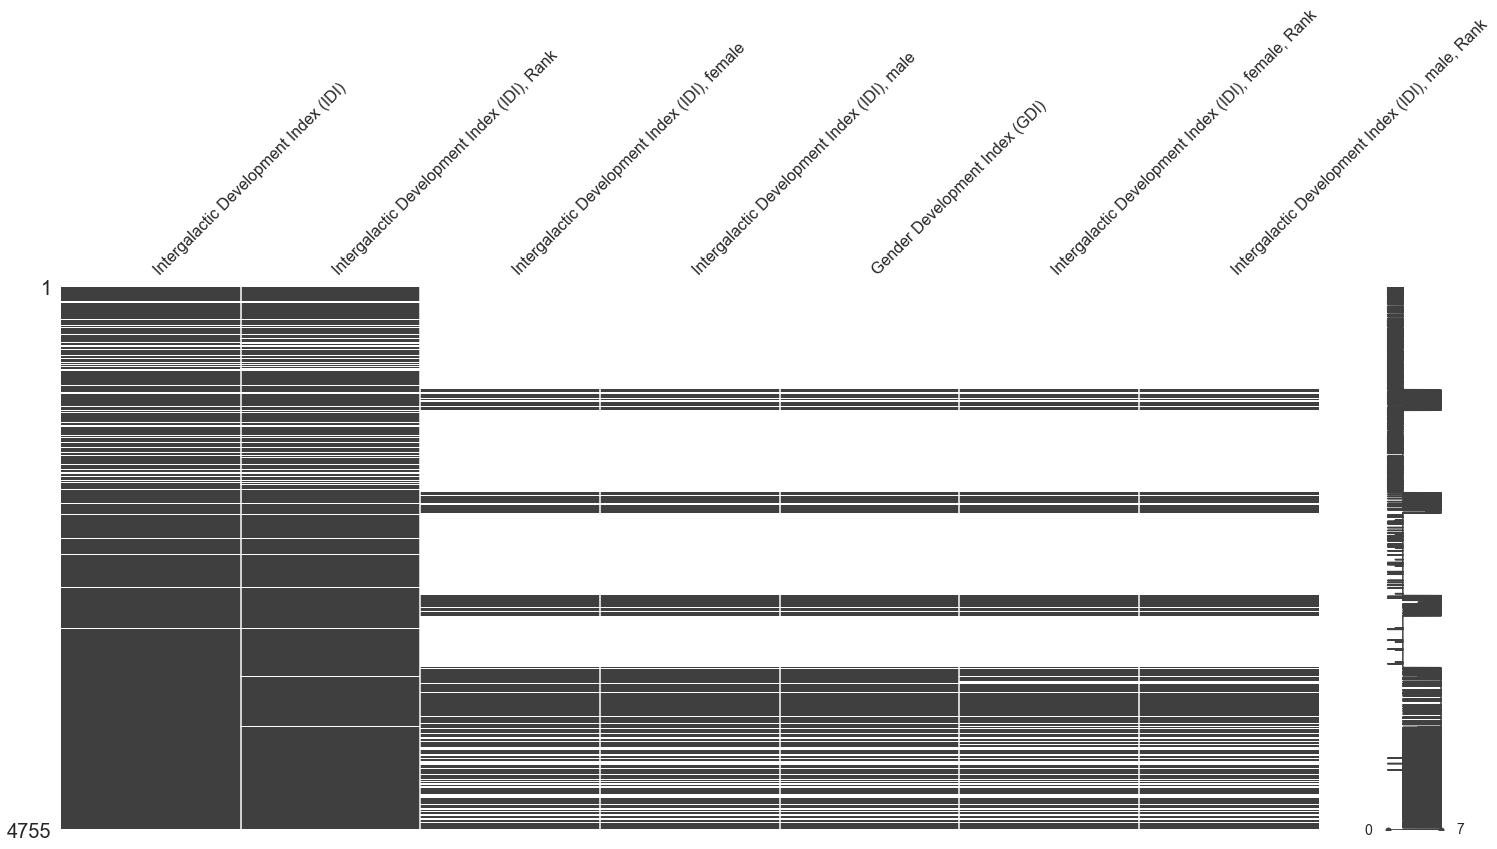

In [114]:
msno.matrix(df.loc[:, df.columns.str.contains(keyword)])

In [115]:
i_galaxy = 10
galaxy = df.galaxy.unique()[i_galaxy]
print('Galaxy:', galaxy)
df.loc[df.galaxy == galaxy, df.columns.str.contains(keyword)]

Galaxy: Antlia Dwarf


,Intergalactic Development Index (IDI),"Intergalactic Development Index (IDI), Rank","Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank"
10,0.754593,159.343087,NaN,NaN,NaN,NaN,NaN
199,0.721569,134.563094,NaN,NaN,NaN,NaN,NaN
450,0.761333,131.669343,NaN,NaN,NaN,NaN,NaN
587,0.726543,131.472052,NaN,NaN,NaN,NaN,NaN
747,0.734010,163.705778,NaN,NaN,NaN,NaN,NaN
948,0.726175,139.993180,0.693942,0.658874,1.066571,137.441821,140.359013
1099,0.702480,140.790098,NaN,NaN,NaN,NaN,NaN
1427,0.707104,154.182253,NaN,NaN,NaN,NaN,NaN
1493,0.799768,173.136737,NaN,NaN,NaN,NaN,NaN
1762,0.635794,157.221734,NaN,NaN,NaN,NaN,NaN


In [112]:
df.columns[df.columns.str.contains(keyword)]

Index(['Intergalactic Development Index (IDI)', 'Intergalactic Development Index (IDI), Rank',
       'Intergalactic Development Index (IDI), female',
       'Intergalactic Development Index (IDI), male', 'Gender Development Index (GDI)',
       'Intergalactic Development Index (IDI), female, Rank',
       'Intergalactic Development Index (IDI), male, Rank'],
      dtype='object')

In [106]:
px.scatter(data_frame=df,
          x='Interstellar phone subscriptions (per 100 people)',
          y='Interstellar Data Net users, total (% of population)')

In [116]:
df['idi_mf_mean'] = df[['Intergalactic Development Index (IDI), female',
   'Intergalactic Development Index (IDI), male']].mean(axis=1)

px.scatter_matrix(data_frame=df[['idi_mf_mean',
                                'Intergalactic Development Index (IDI)',
                                'Gender Development Index (GDI)']])

In [31]:
# df['income_mean'] = (df['Estimated gross galactic income per capita, female'] + df['Estimated gross galactic income per capita, male']) / 2
# df['secondary_edu_mf_mean'] = df[['Population with at least some secondary education, female (% ages 25 and older)',
#    'Population with at least some secondary education, male (% ages 25 and older)']].mean(axis=1)

px.scatter(df, x='Estimated gross galactic income per capita, female', 
           y='Gross income per capita')

In [17]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df.loc[df.income_mean.notna(), 'Gross income per capita'],
                   df.loc[df.income_mean.notna(), 'income_mean'], squared=False)

7642.131796877473

In [22]:
train.loc[[3069],:]

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
3069,1007012,KUG 1210+301B (KK98 127),0.842483,78.180222,-126.906522,0.56284,14.330079,7.091169,0.682565,0.621393,207.410498,98.924591,73.895846,35.698449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047275


In [19]:
df[df['Gross income per capita']<0]

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,"Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,income_mean
3069,1007012,KUG 1210+301B (KK98 127),0.842483,78.180222,-126.906522,0.56284,14.330079,7.091169,0.682565,0.621393,207.410498,98.924591,73.895846,35.698449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047275,NaN


In [18]:
df['Gross income per capita'].describe()

count      4722.000000
mean      32012.256318
std       18789.386644
min        -126.906522
25%       20352.347803
50%       26876.396842
75%       37871.098911
max      151072.683156
Name: Gross income per capita, dtype: float64